In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data transformation 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer


# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df= pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
print('No. of Rows: ',df.shape[0])
print('No. of Columns: ',df.shape[1])

No. of Rows:  1599
No. of Columns:  12


In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
X = df.drop(columns = ['quality'], axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [6]:
y = df['quality']
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [7]:
scaler=StandardScaler(with_mean=False)
scaler.fit(X)

X= scaler.transform(X)

print('x shape: ',X.shape)
print('y shape: ',y.shape)

x shape:  (1599, 11)
y shape:  (1599,)


In [8]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1279, 11), (320, 11))

In [9]:
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    r2_square = r2_score(actual, predicted)
    return mae, rmse, r2_square
    
models = {
    "Linear Regression": LinearRegression(),
    "ElasticNet": ElasticNet(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.6513
- Mean Absolute Error: 0.4996
- R2 Score: 0.3480
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.6245
- Mean Absolute Error: 0.5035
- R2 Score: 0.4032


ElasticNet
Model performance for Training set
- Root Mean Squared Error: 0.8066
- Mean Absolute Error: 0.6837
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.8107
- Mean Absolute Error: 0.6853
- R2 Score: -0.0056


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.8066
- Mean Absolute Error: 0.6837
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.8107
- Mean Absolute Error: 0.6853
- R2 Score: -0.0056


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.6513
- Mean Absolute Error: 0.4996
- R2 Score: 0.3480
--------------------------------

In [10]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
8,CatBoosting Regressor,0.533687
6,Random Forest Regressor,0.528825
7,XGBRegressor,0.462492
9,AdaBoost Regressor,0.429769
0,Linear Regression,0.403180
3,Ridge,0.403163
4,K-Neighbors Regressor,0.328812
5,Decision Tree,0.014928
1,ElasticNet,-0.005592
2,Lasso,-0.005592


In [11]:
parameter_grids = {'n_neighbors' : np.arange(5,20,5),
                   'weights': ['uniform', 'distance'],
                  'leaf_size' : np.arange(2,20,2),
                   'p' : [1,2]}

model_1 = GridSearchCV(KNeighborsRegressor(),
                      param_grid=parameter_grids,
                      scoring='r2',
                      cv=5,
                      error_score='raise',
                      n_jobs=-1)

model_1.fit(X_train,y_train)

print('r2 Score of KNeighborsRegressor = {:.2f}'.format(model_1.best_score_))
print('Best found Hyperparameter of KNeighborsRegressor = {}'.format(model_1.best_params_))

r2 Score of KNeighborsRegressor = 0.41
Best found Hyperparameter of KNeighborsRegressor = {'leaf_size': 2, 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}


In [12]:
parameter_grids = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error','poisson'],
                  'max_depth' : range(1,30,3), #[1,4,7...]
                  'max_features':[0.25,0.5,0.75,1.0],
                  'min_samples_split' : range(2,20,3)}

model_2 = RandomizedSearchCV(DecisionTreeRegressor(random_state=42),
                      param_distributions= parameter_grids,
                      n_iter= 10,
                      scoring='r2',
                      error_score='raise',
                      cv=5,
                      n_jobs=-1)

model_2.fit(X_train,y_train)

print('r2 Score of DecisionTreeRegressor = {:.2f}'.format(model_2.best_score_))
print('Best found Hyperparameter of DecisionTreeRegressor = {}'.format(model_2.best_params_))

r2 Score of DecisionTreeRegressor = 0.27
Best found Hyperparameter of DecisionTreeRegressor = {'min_samples_split': 17, 'max_features': 1.0, 'max_depth': 4, 'criterion': 'poisson'}


In [13]:
parameter_grids = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
                   'C' : [0.01, 0.1, 10, 20]
                   }

model_3 = GridSearchCV(SVR(),
                      param_grid=parameter_grids,
                      scoring='r2',
                      error_score='raise',
                      cv=5,
                      n_jobs=-1)

model_3.fit(X_train,y_train)

print('r2 Score of SVM = {:.2f}'.format(model_3.best_score_))
print('Best found Hyperparameter of SVM = {}'.format(model_3.best_params_))

r2 Score of SVM = 0.32
Best found Hyperparameter of SVM = {'C': 0.01, 'kernel': 'linear'}


In [14]:
parameter_grids = {'n_estimators' : range(100,150,50),
                   'loss': ['linear', 'square', 'exponential']
                   }

model_4 = GridSearchCV(AdaBoostRegressor(random_state=42),
                      param_grid=parameter_grids,
                      scoring='r2',
                      error_score='raise',
                      cv=5,
                      n_jobs=-1)

model_4.fit(X_train,y_train)

print('r2 Score of AdaBoostRegressor = {:.2f}'.format(model_4.best_score_))
print('Best found Hyperparameter of AdaBoostRegressor = {}'.format(model_4.best_params_))

r2 Score of AdaBoostRegressor = 0.32
Best found Hyperparameter of AdaBoostRegressor = {'loss': 'exponential', 'n_estimators': 100}


In [15]:
parameter_grids = {'n_estimators' : range(100,200,50),
                   'criterion': ['squared_error', 'friedman_mse', 'absolute_error','poisson'],
                  'max_depth' : range(2,20,3), 
                  'max_features':[0.5,0.75,1.0],
                  'min_samples_split' : range(2,10,3)}

model_5 = RandomizedSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1),
                      param_distributions= parameter_grids,
                      n_iter= 5,
                      scoring='r2',
                      error_score='raise',
                      cv=5,
                      n_jobs=-1)

model_5.fit(X_train,y_train)

print('r2 Score of RandomForestRegressor = {:.2f}'.format(model_5.best_score_))
print('Best found Hyperparameter of RandomForestRegressor = {}'.format(model_5.best_params_))

r2 Score of RandomForestRegressor = 0.43
Best found Hyperparameter of RandomForestRegressor = {'n_estimators': 150, 'min_samples_split': 2, 'max_features': 0.75, 'max_depth': 14, 'criterion': 'poisson'}


In [16]:
y_predict= model_5.predict(X_test)
print('\Random Forest Regressor R2_Score on Test: ',r2_score(y_test, y_predict)*100,'%')

\Random Forest Regressor R2_Score on Test:  53.1716779152873 %


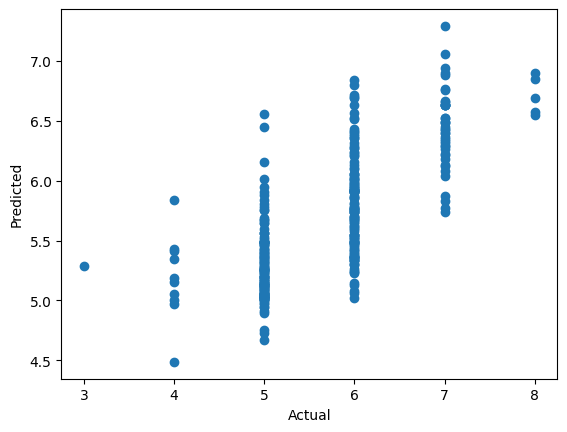

In [20]:
plt.scatter(y_test,y_predict);
plt.xlabel('Actual');
plt.ylabel('Predicted');

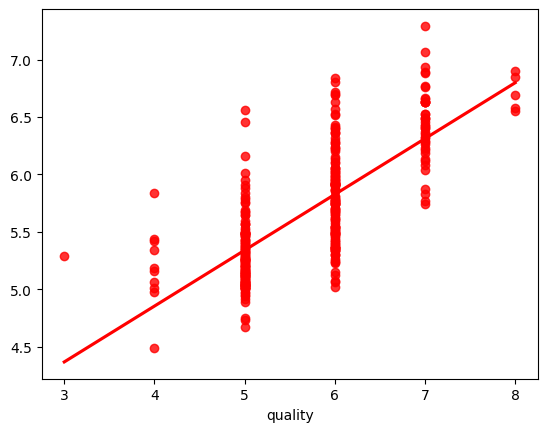

In [23]:
sns.regplot(x=y_test,y=y_predict,ci=None,color ='red');

In [24]:
predicated_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_predict, 'Difference':y_test-y_predict}).astype(int)
predicated_df

,Actual Value,Predicted Value,Difference
803,6,5,0
124,5,5,0
350,6,5,0
682,5,5,0
1326,6,5,0
...,...,...,...
1259,6,5,0
1295,5,5,0
1155,5,5,0
963,6,6,0
